<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Classification Art Category</title>
    <style>
        body {
            margin: 0;
            padding: 0;
            display: flex;
            flex-direction: column;
            align-items: center;
            background-color: #000;
            color: white;
        }
        h1 {
            font-size: 5em;
            font-weight: bold;
            text-align: center;
        }
    </style>
</head>
<body>
    <h1>Classification Art Category</h1>
</body>
</html>

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Sommaire - Classification Art</title>
    <style>
        body {
            margin: 0;
            padding: 0;
            display: flex;
            flex-direction: column;
            justify-content: center;
            align-items: center;
            height: 100vh;
            background-color: #000;
            color: white;
            font-family: Arial, sans-serif;
        }
        h1 {
            font-weight: bold;
            text-align: center;
            margin-bottom: 20px;
            font-size: 3em;
        }
        ul {
            list-style-type: none;
            text-align: center;
            font-size: 2em;
            line-height: 2em;
            margin: 0;
            padding: 0;
        }
    </style>
</head>
<body>
    <h1>Sommaire</h1>
    <ul>
        <li>1. Présentation de la base de données</li>
        <li>2. DataLoader et Data Augmentation</li>
        <li>3. Reseau FC</li>
        <li>4. Reseau CNN</li>
        <li>5. Transfer Learning</li>
    </ul>
</body>
</html>

In [1]:
import collections
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import numpy as np
import artlib
import os

NUM_CLASSES = 13
INPUT_SHAPE = (224,224)
INPUT_SHAPE_CNN = (128,128)
BATCH_SIZE = 64
DATASET_PATH = 'dataset_600'

classes = [d for d in os.listdir(DATASET_PATH) if os.path.isdir(os.path.join(DATASET_PATH, d))]
classes

['Academic_Art',
 'Art_Nouveau',
 'Baroque',
 'Expressionism',
 'Japanese_Art',
 'Neoclassicism',
 'Primitivism',
 'Realism',
 'Renaissance',
 'Rococo',
 'Romanticism',
 'Symbolism',
 'Western_Medieval']

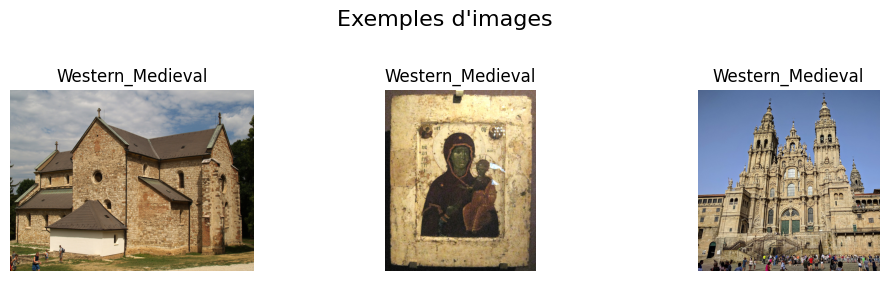

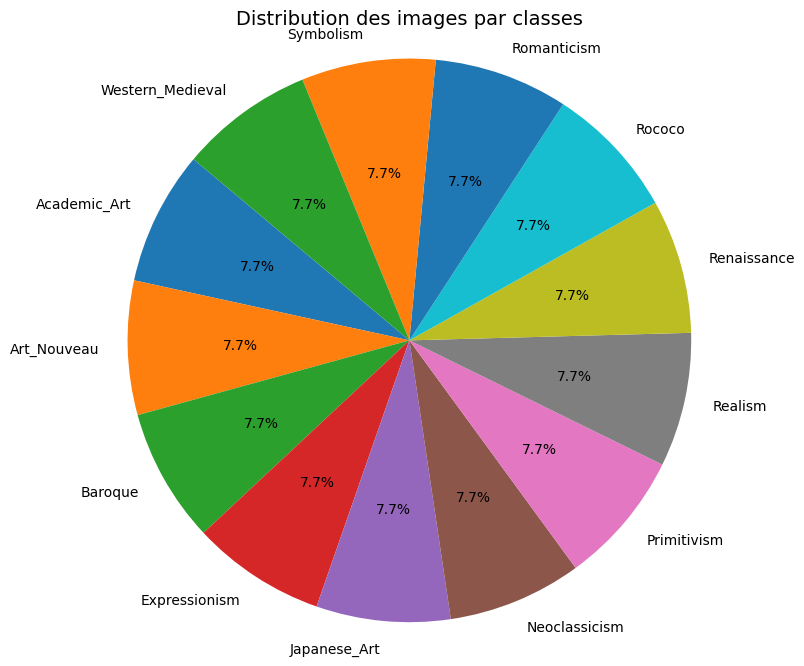

In [2]:
sample_images,class_counts = artlib.sample_images_class_count()
artlib.show_sample_images(sample_images)
artlib.plot_pie_chart(class_counts)

In [3]:
train, valid = image_dataset_from_directory(
                        directory = DATASET_PATH,
                        batch_size=BATCH_SIZE,
                        image_size=INPUT_SHAPE,
                        validation_split=0.2,
                        subset='both',
                        seed = 14
            )

train_cnn, valid_cnn = image_dataset_from_directory(
                        directory = DATASET_PATH,
                        batch_size=BATCH_SIZE,
                        image_size=INPUT_SHAPE_CNN,
                        validation_split=0.2,
                        subset='both',
                        seed = 14
            )

Found 7800 files belonging to 13 classes.
Using 6240 files for training.
Using 1560 files for validation.
Found 7800 files belonging to 13 classes.
Using 6240 files for training.
Using 1560 files for validation.


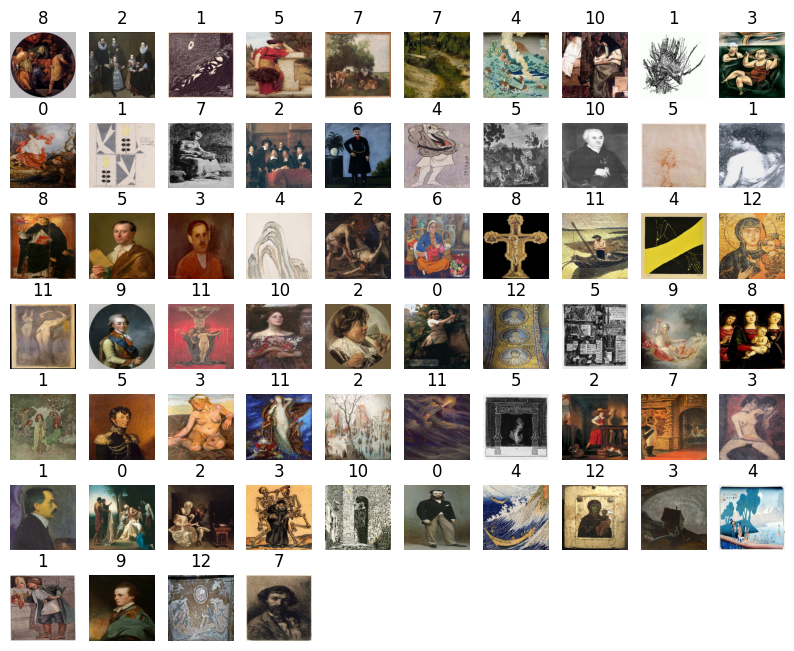

In [4]:
artlib.ShowSamples(train)

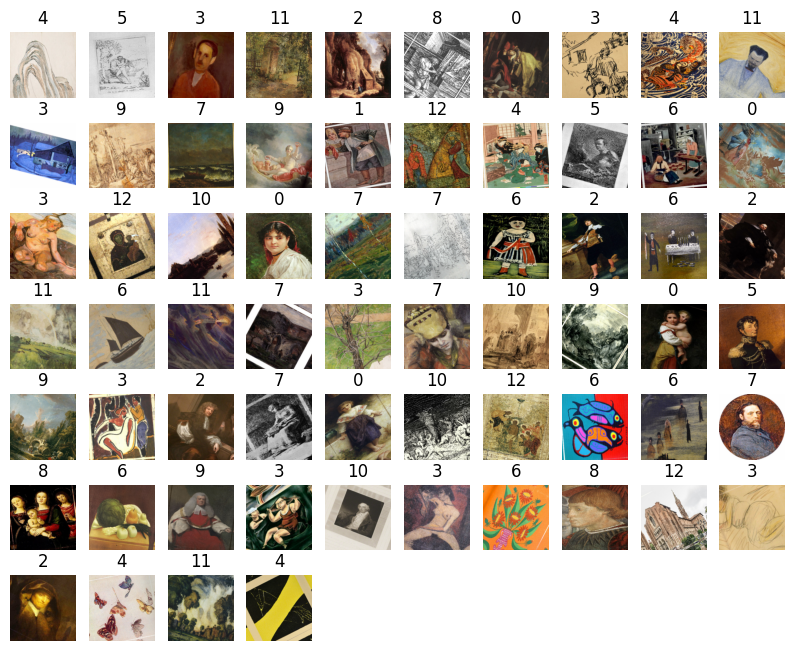

In [5]:
data_augmentation_layers = [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
]

def data_augmentation(images):
        for layer in data_augmentation_layers:
                images = layer(images)
        return images

augmented_train = train.map( lambda x, y: (data_augmentation(x), y))
augmented_train_cnn = train_cnn.map( lambda x, y: (data_augmentation(x), y))

artlib.ShowSamples(augmented_train)

In [6]:
class_names = valid.class_names

lancement programme


# **Réseau - FC**

In [7]:
learning_rates = [0.01, 0.001, 0.0001]
epochs = [3]

print("✅ INPUT_SHAPE utilisé :", INPUT_SHAPE)
for x, y in train.take(1):
    print("✅ Shape des entrées :", x.shape, "| Type :", x.dtype)

hyperparams = artlib.generate_hyperparameter_combinations(learning_rates,epochs)
df_results_fc, best_model_fc, best_history_fc = artlib.train_all_models(
    model_type="FC",
    hyperparams=hyperparams,
    train=train,
    valid=valid,
    augmented_train=augmented_train
)

In [8]:
df_sorted_fc = df_results_fc.sort_values(by="final_val_accuracy", ascending=False)
df_sorted_fc

In [9]:
# Affichage des courbes d'apprentissage
artlib.plot_training_curves(best_model_fc)

In [ ]:
# Affichage de la matrice de confusion
artlib.plot_confusion_matrix(best_model_fc, valid, class_names)

In [ ]:
# Affichage du rapport de classification
artlib.plot_classification_report(best_model_fc, valid, class_names)

In [ ]:
# Affichage de la précision par classe
artlib.plot_precision_by_class(best_model_fc, valid, class_names)

In [ ]:
# Affichage du rappel par classe
artlib.plot_recall_by_class(best_model_fc, valid, class_names)

# **Réseau - CNN**

In [10]:
# learning_rates = [0.01, 0.001, 0.0001]
# epochs = [5]

# hyperparams = artlib.generate_hyperparameter_combinations(learning_rates,epochs)
# df_results_cnn, best_model_cnn, best_history_cnn = artlib.train_all_models(
#     model_type="CNN",
#     hyperparams=hyperparams,
#     dataset_dictionnary =dataset_dictionnary_cnn,
# )

In [11]:
# df_sorted_cnn = df_results_cnn.sort_values(by="final_val_accuracy", ascending=False)
# df_sorted_cnn

In [12]:
# # Affichage des courbes d'apprentissage
# artlib.plot_training_curves(best_model_cnn)

In [ ]:
# # Affichage de la matrice de confusion
# artlib.plot_confusion_matrix(best_model_cnn, valid_preprocess, class_names)

In [ ]:
# # Affichage du rapport de classification
# artlib.plot_classification_report(best_model_cnn, valid_preprocess, class_names)

In [ ]:
# # Affichage de la précision par classe
# artlib.plot_precision_by_class(best_model_cnn, valid_preprocess, class_names)

In [ ]:
# # Affichage du rappel par classe
# artlib.plot_recall_by_class(best_model_cnn, valid_preprocess, class_names)

# **Réseau - TF**

In [ ]:
learning_rates = [0.001, 0.0005, 0.0001]
epochs = [5]

hyperparams = artlib.generate_hyperparameter_combinations(learning_rates,epochs)
df_results_tl, best_model_tl, best_history_tl = artlib.train_all_models(
    model_type="TL",
    hyperparams=hyperparams,
    train=train,
    valid=valid,
    augmented_train=augmented_train
)

🔍 Entraînement avec les paramètres : {'epochs': 5, 'learning_rate': 0.001, 'dropout': True, 'data_augmentation': False}
🚀 Initialisation du modèle TL...
🔄 Prétraitement des données pour Transfer Learning...
📊 Début de l'entraînement...
Epoch 1/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 116s 1s/step - accuracy: 0.2334 - loss: 2.9983 - val_accuracy: 0.4609 - val_loss: 1.7312
Epoch 2/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 112s 1s/step - accuracy: 0.4505 - loss: 1.8354 - val_accuracy: 0.5186 - val_loss: 1.5395
Epoch 3/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 111s 1s/step - accuracy: 0.5027 - loss: 1.5919 - val_accuracy: 0.5429 - val_loss: 1.4866
Epoch 4/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 110s 1s/step - accuracy: 0.5295 - loss: 1.4797 - val_accuracy: 0.5385 - val_loss: 1.5021
Epoch 5/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 111s 1s/step - accuracy: 0.5406 - loss: 1.4530 - val_accuracy: 0.5462 - val_loss: 1.4796
✅ Entraînement terminé.
🏆 Meilleur modèle : 54.62% de final_val_accuracy


In [21]:
df_sorted_tf = df_results_tl.sort_values(by="final_val_accuracy", ascending=False)
df_sorted_tf

,epochs,learning_rate,dropout,data_augmentation,final_loss,final_accuracy,final_val_loss,final_val_accuracy
0,5,0.001,True,False,1.440491,0.544391,1.479601,0.546154


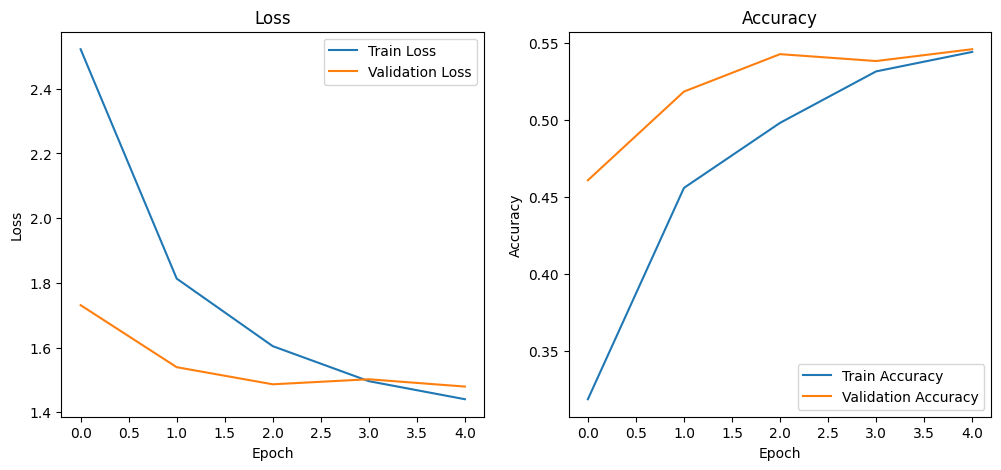

In [24]:
# Affichage des courbes d'apprentissage
artlib.plot_training_curves(best_history_tl)

In [ ]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input 
valid_preprocess = valid.map(lambda x, y: (preprocess_input(x), y))

25/25 ━━━━━━━━━━━━━━━━━━━━ 24s 929ms/step
Forme initiale de y_true : (1560,)
Les étiquettes sont déjà sous forme d'entiers.


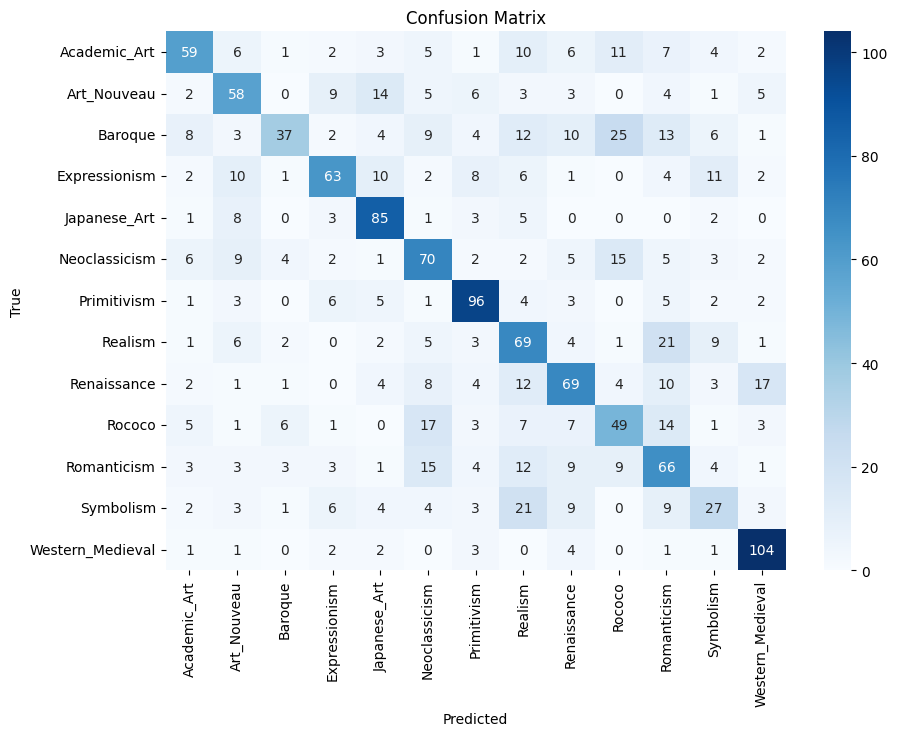

In [25]:
# Affichage de la matrice de confusion
artlib.plot_confusion_matrix(best_model_tl, valid_preprocess, class_names)

In [26]:
# Affichage du rapport de classification
artlib.plot_classification_report(best_model_tl, valid_preprocess, class_names)


25/25 ━━━━━━━━━━━━━━━━━━━━ 24s 920ms/step
Rapport de classification:
                  precision    recall  f1-score   support

    Academic_Art       0.63      0.50      0.56       117
     Art_Nouveau       0.52      0.53      0.52       110
         Baroque       0.66      0.28      0.39       134
   Expressionism       0.64      0.53      0.58       120
    Japanese_Art       0.63      0.79      0.70       108
   Neoclassicism       0.49      0.56      0.52       126
     Primitivism       0.69      0.75      0.72       128
         Realism       0.42      0.56      0.48       124
     Renaissance       0.53      0.51      0.52       135
          Rococo       0.43      0.43      0.43       114
     Romanticism       0.42      0.50      0.45       133
       Symbolism       0.36      0.29      0.33        92
Western_Medieval       0.73      0.87      0.79       119

        accuracy                           0.55      1560
       macro avg       0.55      0.55      0.54      1560
 

25/25 ━━━━━━━━━━━━━━━━━━━━ 23s 898ms/step


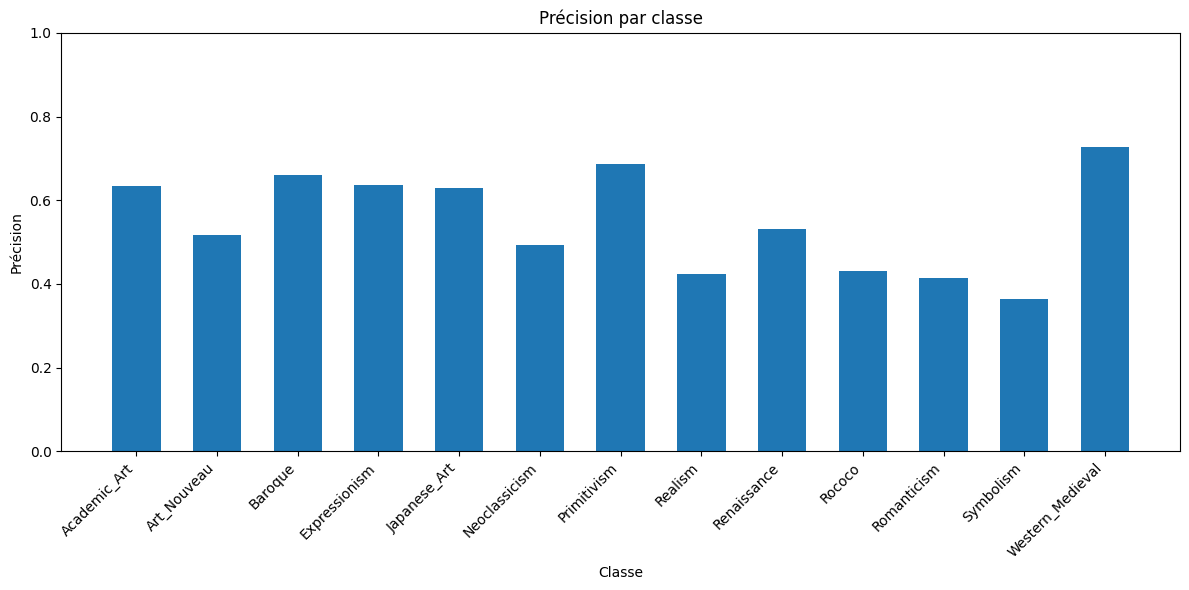

In [30]:
# Affichage de la précision par classe
artlib.plot_precision_by_class(best_model_tl, valid_preprocess, class_names)

25/25 ━━━━━━━━━━━━━━━━━━━━ 24s 921ms/step


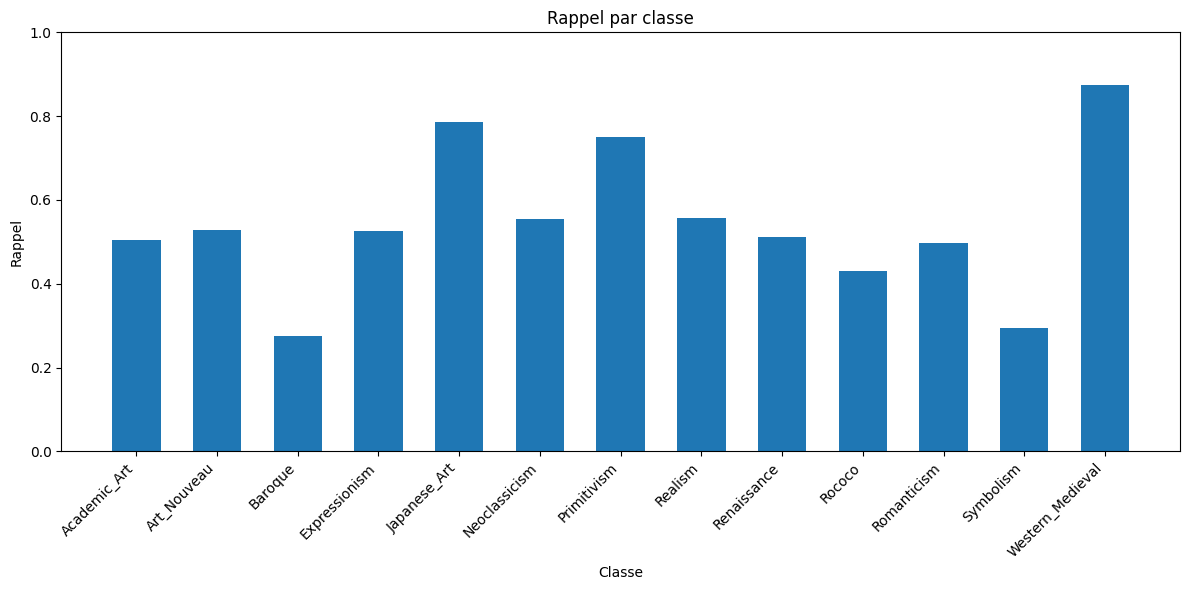

In [32]:
# Affichage du rappel par classe
artlib.plot_recall_by_class(best_model_tl, valid_preprocess, class_names)